<a href="https://colab.research.google.com/github/VinayPanapati/facial-expression/blob/main/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
img=cv2.imread(r"/content/facialexpressions.jpg")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


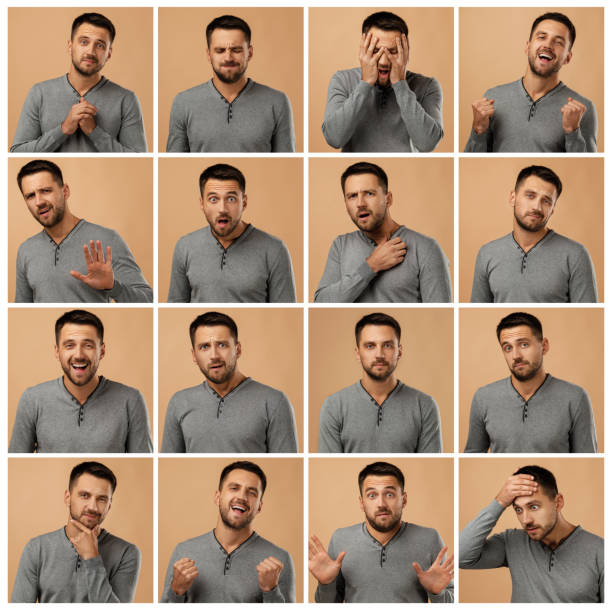

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
img.shape

(611, 612, 3)

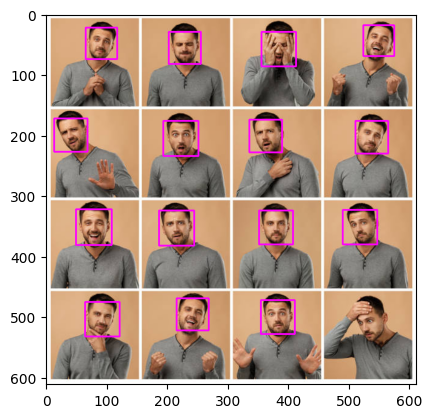

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/facialexpressions.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.01, minNeighbors=50)

# Draw rectangles around the detected faces
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)

# Display the image with detected faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

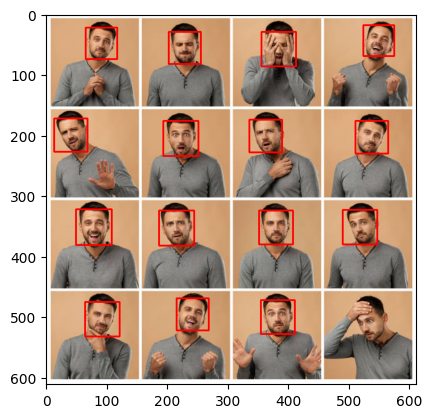

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
img = cv2.imread("/content/facialexpressions.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.01, minNeighbors=45)

# Draw rectangles around the detected faces
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Define the region of interest for eyes within the detected face region
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.08, minNeighbors=20)
    # Draw rectangles around the detected eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

# Display the image with detected faces and eyes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=da4478f3baffe7d96f68fcab15d8e256e61fdc2eb57a0964a99224b13f5f3c55
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


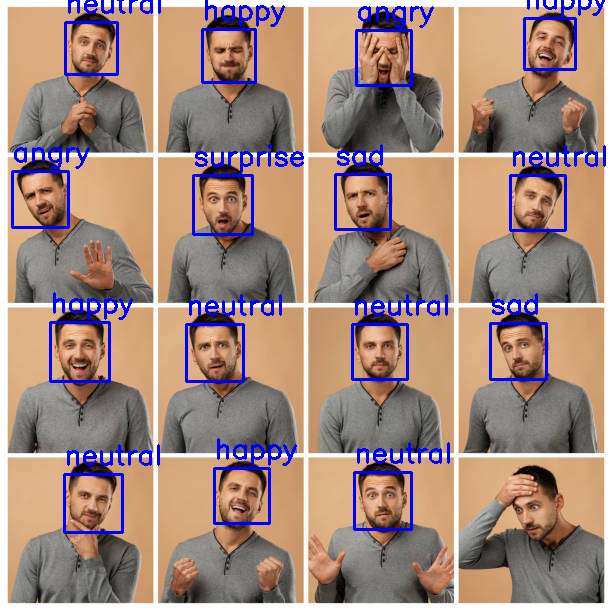

In [17]:
import cv2
from google.colab.patches import cv2_imshow
from deepface import DeepFace

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Path to the image
image_path = "/content/facialexpressions.jpg"

# Read the image
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region from the image
        face_roi = image[y:y+h, x:x+w]

        # Perform emotion recognition
        results = DeepFace.analyze(face_roi, actions=['emotion'])

        # Check if results is a list
        if isinstance(results, list):
            # Process each result in the list
            for result in results:
                # Get the dominant emotion
                emotion = result['dominant_emotion']

                # Draw rectangle around the face
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Display the detected emotion above the face
                cv2.putText(image, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        else:
            # Get the dominant emotion
            emotion = results['dominant_emotion']

            # Draw rectangle around the face
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Display the detected emotion above the face
            cv2.putText(image, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image with detected faces and emotions
    cv2_imshow(image)
